# ***EasyOCR***
**-Optical Character Reading**

In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.0 MB 1.1 MB/s 
     |████████████████████████████████| 604 kB 68.6 MB/s 
     |████████████████████████████████| 108 kB 68.5 MB/s 
     |████████████████████████████████| 47.6 MB 2.1 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
#import libraries

import cv2
import numpy as np
import tensorflow as tf

import easyocr
from PIL import Image

In [ ]:
#image pre-processing with Tensorflow

def processing(img_path, input_size):
  img= tf.io.read_file(img_path)  #read image
  img= tf.io.decode_image(img, channels=3)  #decode 
  img= tf.image.convert_image_dtype(img, tf.uint8)  #convert

  org_image= img

  resize= tf.image.resize(img, input_size)
  resize= resize[tf.newaxis, :]

  return org_image, resize

In [ ]:
#set the tensors for object detection

def for_input(convert, image):
  index= convert.get_input_details()[0]['index']
  input= convert.tensor(index)()[0]
  input[:, :]= image


def for_output(convert, index):
  output= convert.get_output_details()[index]
  tensor = np.squeeze(convert.get_tensor(output['index']))
  return tensor

In [ ]:
#Object detection

def object_detection(convert, image, threshold):
  for_input(convert, image)  #passing input image to model
  convert.invoke()

  score= for_output(convert, 0)
  count= int(for_output(convert, 2))
  classes= for_output(convert, 3)

  results= []  #to store object_detection results

  for i in range(count):
    if score[i]>= threshold:
      result= {
        'class_id': classes[i],
        'score': score[i]
      }
      results.append(result)

  return results

In [ ]:
#Connecting image processing with object detection

def final_obeject_detect(img_path, convert, threshold=0.5):
    _, img_height, img_width, _= convert.get_input_details()[0]['shape']  #image shape

    org_img, img_pr= processing(img_path,(img_height, img_width))  #processing

    results= object_detection(convert, img_pr, threshold=threshold)  #apply object detection on image

    org_img_np= org_img.numpy().astype(np.uint8)

    for objct in results:

        read= easyocr.Reader(['bn'])  #read with EasyOCR
        result= read.readtext('//content/LP_Dataset/130.jpg', paragraph="False")

        print(result[0][1])

    #final
    original= org_img_np.astype(np.uint8)
    return original

In [ ]:
#load the model

model= tf.lite.Interpreter(model_path='/content/model.tflite')
model.allocate_tensors()

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ঢাকা মেট্রো- গ ৩৩-৬১২৮


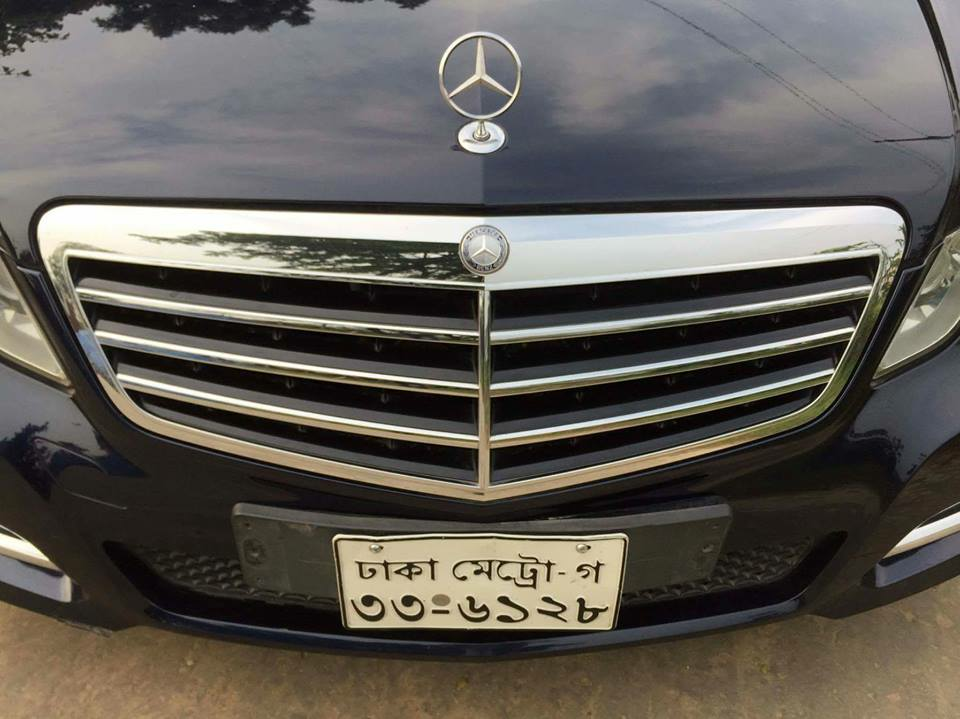

In [ ]:
#Detector

run_image= '/content/LP_Dataset/130.jpg'
th= 0.5

detected_plate_number= final_obeject_detect(run_image, model, threshold=th)  #detection based on object detection

#Display the final detection
Image.fromarray(detected_plate_number)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:253: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will be removed in 0.15. Please access them via the appropriate Weights Enum instead.
  "Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and will "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ঢাকা মেট্রো গ ৩১-১৫২৪


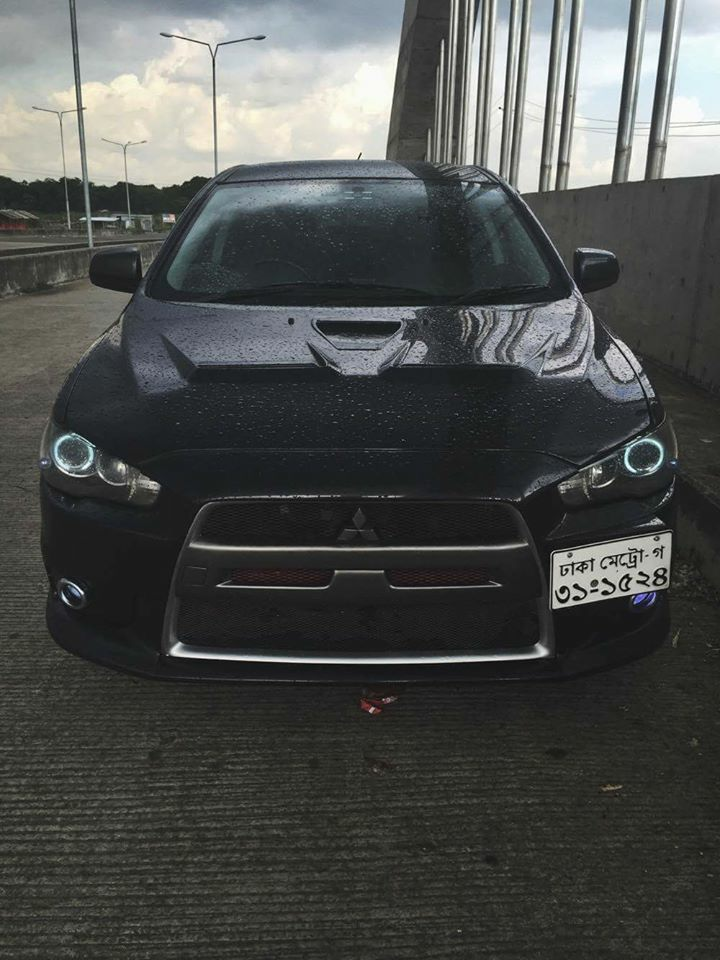

In [ ]:
#Detector

run_image= '/content/LP_Dataset/141.jpg'
th= 0.5

detected_plate_number= final_obeject_detect(run_image, model, threshold=th)  #detection based on object detection

#Display the final detection
Image.fromarray(detected_plate_number)